In [21]:
import hdbscan
import csv
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

In [22]:
t = np.array([ 1, 2, 3, 3, 3, 3 ])
print(t == 3)
print(t[np.where(t == 3)])

[False False  True  True  True  True]
[3 3 3 3]


In [23]:
data = []
x = []
y = []

with open('testcluster.csv', mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
        else:
            data.append([float(row['x']), float(row['y'])])
            x.append(float(row['x']))
            y.append(float(row['y']))
        line_count += 1
    print(f'Processed {line_count} lines.')
    
data = np.array(data)


Column names are x, y, line, cp, algo, up00, up01, up02, up10, up11, up12, up20, up21, up22, front00, front01, front02, front10, front11, front12, front20, front21, front22, right00, right01, right02, right10, right11, right12, right20, right21, right22, left00, left01, left02, left10, left11, left12, left20, left21, left22, down00, down01, down02, down10, down11, down12, down20, down21, down22, back00, back01, back02, back10, back11, back12, back20, back21, back22
Processed 2102 lines.


In [26]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=19, min_samples=10)
cluster_labels = clusterer.fit_predict(data)
print(clusterer.probabilities_)
print(clusterer.labels_)

[0. 0. 0. ... 1. 1. 1.]
[-1 -1 -1 ...  5 19 20]


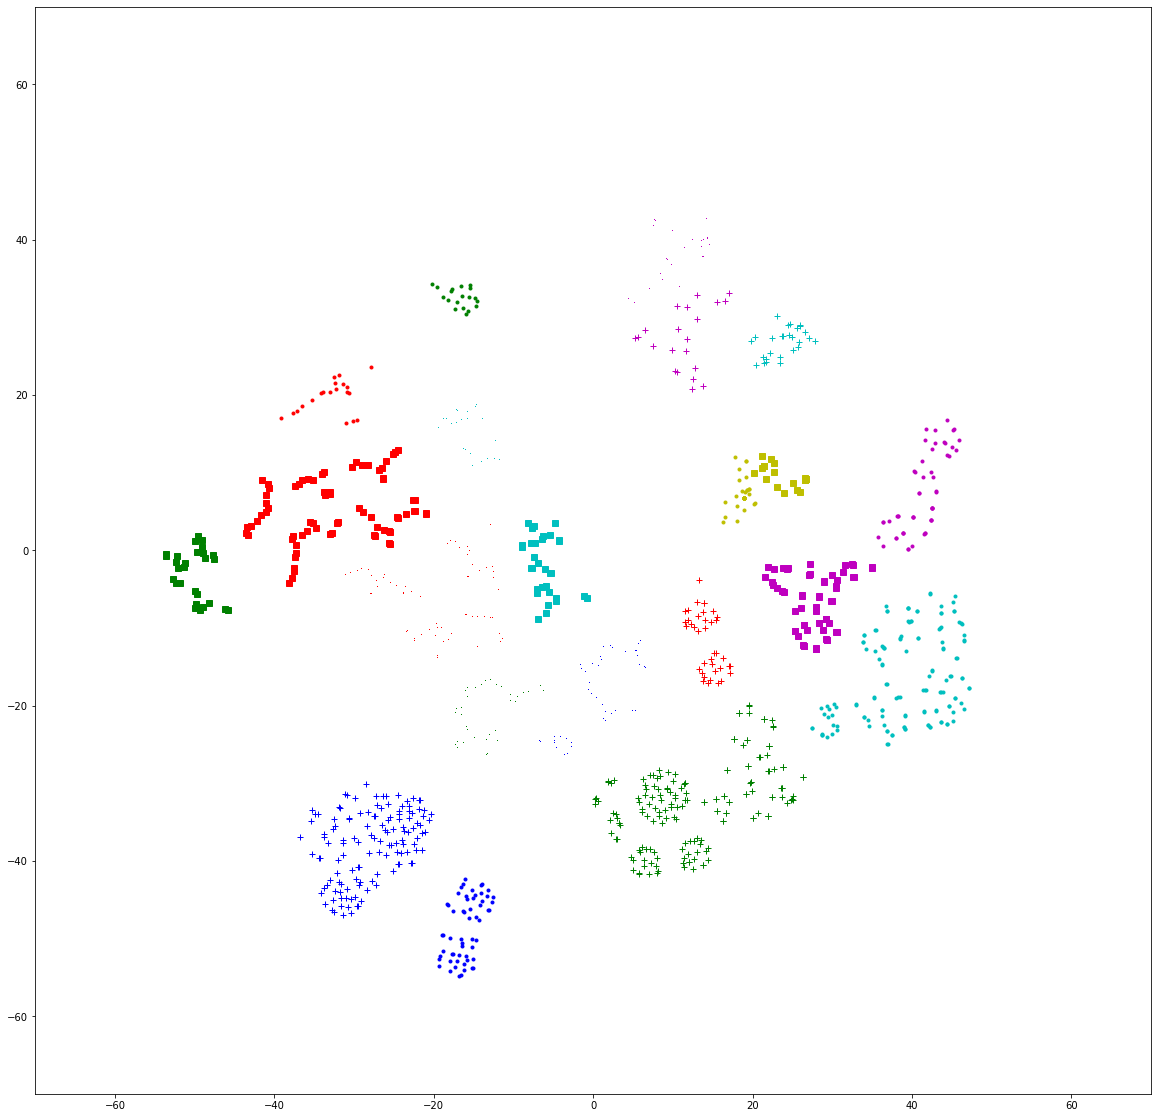

In [27]:
labels, indices, counts = np.unique(cluster_labels, axis=0, return_inverse=True, return_counts=True)
plt.figure(figsize=(20,20))
li = 0
for label in labels:
    
    #print(label)
    labelIndices = np.where(cluster_labels == label)[0]
    #print(labelIndices)
    #print(data[labelIndices])
    selection = data[labelIndices]
    probs = clusterer.probabilities_[labelIndices]
    x = []
    y = []
    ss = []
    for col in ['b', 'g', 'r', 'c', 'm', 'y', 'k']:
        ss.append(col + 's')
        ss.append(col + '.')
        ss.append(col + '+')
        ss.append(col + ',')
    
    for indx, xy in enumerate(selection):
        if probs[indx] > 0.7:
            x.append(xy[0])
            y.append(xy[1])
        
    plt.plot(x, y, ss[li])
    li = li + 1
    
    if li >= len(ss):
        li = 0



plt.axis([-70, 70, -70, 70])
plt.show()